In [1]:
from ramCOH import functions as f
import ramCOH.processing as ram
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout(colors=ps.colors.vitaminC)

In [2]:
ne_file = r"./neon/Ne_2021_02_24_10_09_24_532nm_Edge_100%_Cuvette_H50_1800 (450-850nm)_30s x 2_01.txt"
x, y = np.genfromtxt(ne_file, unpack=True)

In [3]:
neon = ram.neon(x, y)
neon.baselineCorrect(neon.birs, smooth_factor=1)
neon.calculate_noise()
neon.noise

# hasattr(neon, "birs")

1.6190647046517377

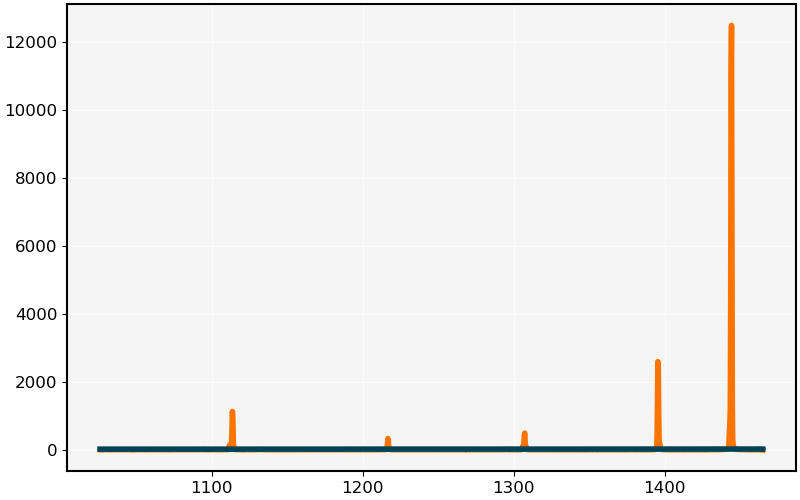

In [7]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(neon.x, neon.intensities["BC"])
plt.plot(neon.x, neon.baseline)

plt.show()

In [5]:
neon.deconvolve(noise_threshold=8, peak_prominence=1, fit_window=8, min_peak_width=1, noise=neon.noise)

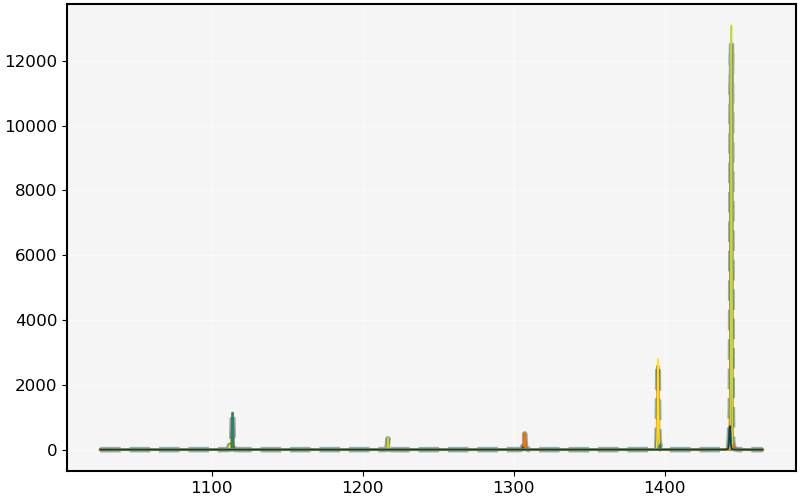

In [6]:
stepsize = abs(np.diff(x).mean())
x_curve = np.arange(x.min(), x.max(), stepsize / 10)

%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(neon.x, neon.intensities["BC"], linewidth=2)
plt.plot(neon.x, f.sum_GaussLorentz(neon.x, *neon.deconvolution_parameters), alpha=0.4, linestyle="dashed")
# plt.plot(x, spline)
for curve in neon.peaks:
    plt.plot(x_curve, f.GaussLorentz(x_curve, **curve), linewidth=1.2)
